# Assignment1 
## Part A : Composite Image Generation

## Load Image Directories

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from partA import *

with open('./manmade_training.txt') as manmade_training:
    dir_manmade = manmade_training.read().splitlines()
with open('./natural_training.txt') as natural_training:
    dir_natural = natural_training.read().splitlines()

## Process Source Images

In [2]:
if not os.path.isfile("./resize_image.txt"):
    resize_source(dir_natural,refresh_txt=True)
    resize_source(dir_manmade,refresh_txt=False)

with open('./resize_image.txt') as resize_image:
    dir_resize = resize_image.read().splitlines()

## Choose a Target Image

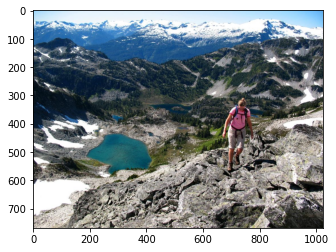

In [3]:
img_target = cv2.imread(dir_natural[199])
# img_target = cv2.imread('wallhaven-rd3pjw.jpg')
plt.imshow(img_target[:,:,::-1])
plt.show()

## Create Composite Image
Note: the pool need only to be built once before restarting kernel

In [4]:
tiles = (16,16)
if 'pool' in globals() or 'pool' in locals():
    _,img_composite = get_composite(img_target,dir_resize,tiles,pool)
else:
    pool,img_composite = get_composite(img_target,dir_resize,tiles)

matching tiles: 100%|██████████| 48/48 [00:08<00:00,  5.53it/s]


### Raw Composition

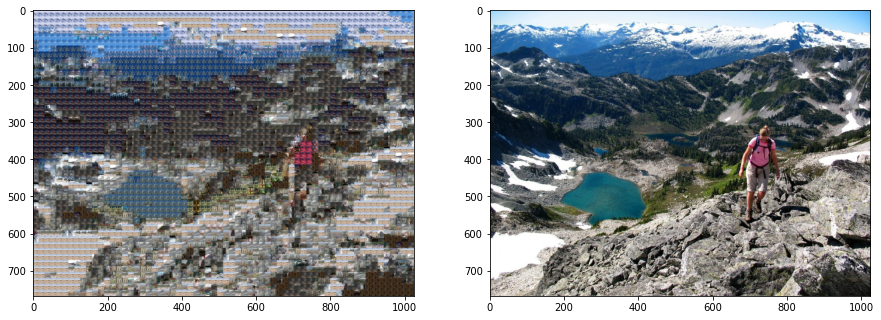

In [5]:
# raw composite
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_composite[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(img_target[:,:,::-1])
plt.show()

### Composition with Feather

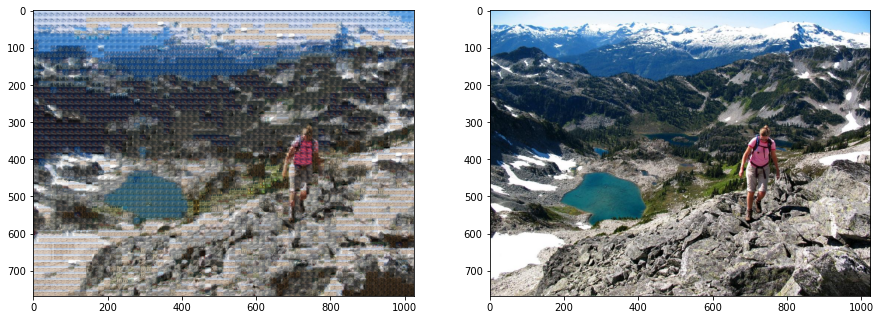

In [9]:
# Feather
alpha = 0.3
img_feather = feather_image(img_target,img_composite,alpha,'corner')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_feather[:,:,::-1].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(img_target[:,:,::-1])
plt.show()